# [Insert Title]

### Authors

* Mia Fryer
* Arthur Kim
* Ian Sharff

## Overview

## Business Problem

## Data Understanding

## Import

In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model

In [21]:
#cd ../data/reorganized_files

[Errno 2] No such file or directory: '../data/reorganized_files'
/Users/miafryer/Documents/flatiron/CT_image_classifier/data/reorganized_files


In [22]:
imgs_pneu = [file for file in os.listdir('PNEUMONIA') if file.endswith('.jpeg')]
imgs_non_pneu = [file for file in os.listdir('NORMAL') if file.endswith('.jpeg')]

In [23]:
print('There are', len(imgs_pneu), 'pneumonia positive images')
print('There are', len(imgs_non_pneu), 'pneumonia negative images')

There are 4273 pneumonia positive images
There are 1583 pneumonia negative images


In [24]:
print('Proportion of images that are COVID-19 Positve Images:', round(len(imgs_pneu)/(len(imgs_pneu)+len(imgs_non_pneu)),2))
print('Proportion of images that are COVID-19 Negative Images:', round(len(imgs_non_pneu)/(len(imgs_pneu)+len(imgs_non_pneu)),2))

Proportion of images that are COVID-19 Positve Images: 0.73
Proportion of images that are COVID-19 Negative Images: 0.27


In [7]:
round(len(imgs_pneu)/len(imgs_non_pneu),1)

2.7

In [8]:
new_dir = 'split/'
org_pneu = 'PNEUMONIA/'
org_norm = 'NORMAL/'

In [9]:
os.mkdir(new_dir)

FileExistsError: [Errno 17] File exists: 'split/'

In [10]:
train_folder = os.path.join(new_dir, 'train')
train_pneu = os.path.join(train_folder, 'PEUNOMIA')
train_non_pneu = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join(new_dir, 'test')
test_pneu = os.path.join(test_folder, 'PNEUMONIA')
test_non_pneu = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join(new_dir, 'val')
val_pneu = os.path.join(val_folder, 'PNEUMONIA')
val_non_pneu = os.path.join(val_folder, 'NORMAL')

In [11]:
os.mkdir(train_folder)
os.mkdir(train_pneu)
os.mkdir(train_non_pneu)

os.mkdir(val_folder)
os.mkdir(val_pneu)
os.mkdir(val_non_pneu)

os.mkdir(test_folder)
os.mkdir(test_pneu)
os.mkdir(test_non_pneu)

FileExistsError: [Errno 17] File exists: 'split/train'

In [12]:
random.shuffle(imgs_pneu)
random.shuffle(imgs_non_pneu)

We want to split the train:validation:test ratio to 60:20:20 for both the pneumonia and non-pneumonia.

In [13]:
print("Train pneumonia should have", round(len(imgs_pneu)*0.6),"images")
print("Validation pneumonia should have", round(len(imgs_pneu)*0.2),"images")
print("Test pneumonia should have", round(len(imgs_pneu)*0.2),"images")
print("Train normal should have", round(len(imgs_non_pneu)*0.6),"images")
print("Validation normal should have", round(len(imgs_non_pneu)*0.2),"images")
print("Test normal should have", round(len(imgs_non_pneu)*0.2),"images")

Train pneumonia should have 2564 images
Validation pneumonia should have 855 images
Test pneumonia should have 855 images
Train normal should have 950 images
Validation normal should have 317 images
Test normal should have 317 images


In [14]:
# train pneumonia
imgs = imgs_pneu[:2564]
for img in imgs:
    origin = os.path.join(org_pneu, img)
    destination = os.path.join(train_pneu, img)
    shutil.copyfile(origin, destination)
    
# validation pneumonia
imgs = imgs_pneu[2564:3419]
for img in imgs:
    origin = os.path.join(org_pneu, img)
    destination = os.path.join(val_pneu, img)
    shutil.copyfile(origin, destination)

# test pneumonia
imgs = imgs_pneu[3419:]
for img in imgs:
    origin = os.path.join(org_pneu, img)
    destination = os.path.join(test_pneu, img)
    shutil.copyfile(origin, destination)

In [15]:
# train non-pneumonia
imgs = imgs_non_pneu[:950]
for img in imgs:
    origin = os.path.join(org_norm, img)
    destination = os.path.join(train_non_pneu, img)
    shutil.copyfile(origin, destination)
    
# validation non-pneumonia
imgs = imgs_non_pneu[950:1267]
for img in imgs:
    origin = os.path.join(org_norm, img)
    destination = os.path.join(val_non_pneu, img)
    shutil.copyfile(origin, destination)
    
# test non-pneumonia
imgs = imgs_non_pneu[1267:]
for img in imgs:
    origin = os.path.join(org_norm, img)
    destination = os.path.join(test_non_pneu, img)
    shutil.copyfile(origin, destination)

In [22]:
print('There are', len(os.listdir(train_pneu)), 'pneumonia images in the training set')
print('There are', len(os.listdir(val_pneu)), 'pneumonia images in the validation set')
print('There are', len(os.listdir(test_pneu)), 'pneumonia images in the testing set')
print('There are', len(os.listdir(train_non_pneu)), 'non-pneumonia images in the training set')
print('There are', len(os.listdir(val_non_pneu)), 'non-pneumonia images in the validation set')
print('There are', len(os.listdir(test_non_pneu)), 'non-pneumonia images in the testing set')

There are 2564 pneumonia images in the training set
There are 855 pneumonia images in the validation set
There are 854 pneumonia images in the testing set
There are 950 non-pneumonia images in the training set
There are 317 non-pneumonia images in the validation set
There are 316 non-pneumonia images in the testing set


In [ ]:
TRAIN_PATH = 'data/original_files/train'
test_image_path = os.path.join(TRAIN_PATH, 'NORMAL/IM-0117-0001.jpeg')
with open(test_image_path, 'rb') as img:
    test_image = Image.open(BytesIO(img.read()))

plt.imshow(img_to_array(test_image), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

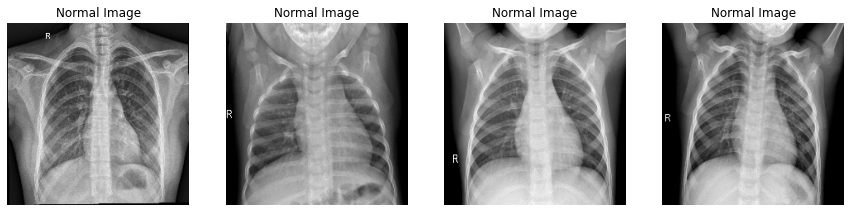

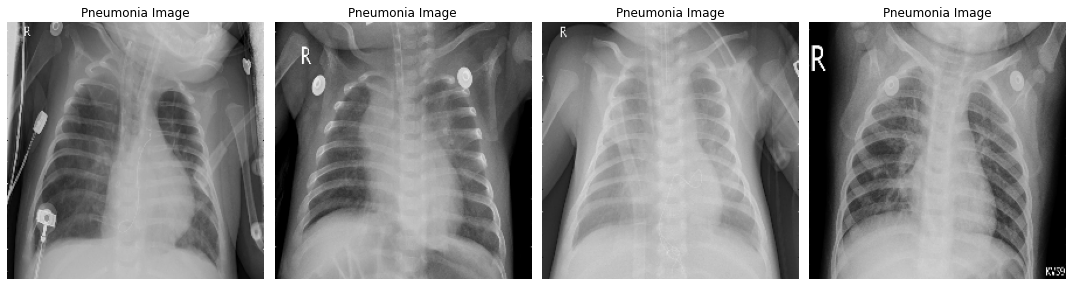

In [126]:

train_path = "data/reorganized_files/split/train/"

normal = glob.glob(train_path+"NORMAL/*.jpeg")
pneumonia = glob.glob(train_path+"PEUNOMIA/*.jpeg")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Normal Image")
        
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Pneumonia Image")
fig.tight_layout()    
plt.show()


In [121]:
#cd CT_image_classifier/

/Users/miafryer/Documents/flatiron/CT_image_classifier


In [122]:
normal_total = glob.glob("data/reorganized_files/NORMAL/*.jpeg")
pneumonia_total = glob.glob("data/reorganized_files/PNEUMONIA/*.jpeg")

number_of_normal_img = len(normal_total)
number_of_pneumonia_img = len(pneumonia_total)
print("number of normal images:", number_of_normal_img)
print("number of pneumonia images:", number_of_pneumonia_img)


number of normal images: 1583
number of pneumonia images: 4273


In [32]:
## Base model

In [40]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size = 180, class_mode='binary') 

Found 4892 images belonging to 2 classes.


In [41]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

Found 2096 images belonging to 2 classes.
Found 2098 images belonging to 2 classes.


In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [44]:
history_base = model.fit(train_generator, 
                                steps_per_epoch=25, 
                                epochs=10, 
                                validation_data=val_generator, 
                                validation_steps=25)

Epoch 1/10
25/25 [==============================] - 36s 1s/step - loss: 0.4791 - acc: 0.7962 - val_loss: 0.4056 - val_acc: 0.8037
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 0.4381 - acc: 0.8102 - val_loss: 0.4118 - val_acc: 0.7663
Epoch 3/10
25/25 [==============================] - 34s 1s/step - loss: 0.4344 - acc: 0.8031 - val_loss: 0.3554 - val_acc: 0.8700
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 0.4088 - acc: 0.8290 - val_loss: 0.4321 - val_acc: 0.7550
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 0.4045 - acc: 0.8226 - val_loss: 0.3161 - val_acc: 0.8763
Epoch 6/10
25/25 [==============================] - 34s 1s/step - loss: 0.3416 - acc: 0.8545 - val_loss: 0.3608 - val_acc: 0.8112
Epoch 7/10
25/25 [==============================] - 34s 1s/step - loss: 0.3734 - acc: 0.8398 - val_loss: 0.4074 - val_acc: 0.8163
Epoch 8/10
25/25 [==============================] - 35s 1s/step - loss: 0.3427 - acc: 0.85

In [45]:
model.save('base_model.h5')

In [46]:
test_x, test_y = next(test_generator)

In [47]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 16ms/step - loss: 0.3780 - acc: 0.8222


In [116]:
#result in the probability of each target class for that specific image
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))

InvalidArgumentError:  Input to reshape is a tensor with 23592960 values, but the requested shape requires a multiple of 100352
	 [[node sequential_2/flatten_2/Reshape (defined at <ipython-input-116-c67fb4150bfc>:2) ]] [Op:__inference_predict_function_47269]

Function call stack:
predict_function


In [52]:
model = load_model('base_model.h5')
# As a reminder 
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

## Transfer Learning ResNet50V2 + Image Augumentation 

In [37]:
#pwd

'/Users/miafryer/Documents/flatiron/CT_image_classifier'

In [72]:
train_val_generator = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.3)
test_generator = ImageDataGenerator(rescale=1./255)

In [73]:
train = train_val_generator.flow_from_directory(train_folder,
                                               batch_size=128,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

Found 4892 images belonging to 2 classes.


In [74]:
val = train_val_generator.flow_from_directory(val_folder,
                                               batch_size=4,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)

Found 2098 images belonging to 2 classes.


In [75]:
test = test_generator.flow_from_directory(test_folder,
                                          batch_size=32,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 2096 images belonging to 2 classes.


In [76]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False

In [77]:
model2 = Sequential()

model2.add(resnet50)    
model2.add(Flatten())
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dropout(0.5))

model2.add(Dense(units = 1, activation = "sigmoid"))

In [78]:

resnet50.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model2.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model2.trainable_weights))

model2.summary()

resnet50v2 False
flatten_3 True
dense_6 True
dropout_1 True
dense_7 True
4
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


In [79]:
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


In [81]:
tf.keras.utils.plot_model(
    model, to_file='model1.png', show_layer_names=True, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [82]:
hist2 = model2.fit(train,validation_data=val,epochs=5)

Epoch 1/5
39/39 [==============================] - 601s 15s/step - loss: 6.2023 - accuracy: 0.7430 - val_loss: 0.2211 - val_accuracy: 0.9180
Epoch 2/5
39/39 [==============================] - 583s 15s/step - loss: 0.2589 - accuracy: 0.8849 - val_loss: 0.1662 - val_accuracy: 0.9376
Epoch 3/5
39/39 [==============================] - 580s 15s/step - loss: 0.2438 - accuracy: 0.9110 - val_loss: 0.1513 - val_accuracy: 0.9490
Epoch 4/5
39/39 [==============================] - 581s 15s/step - loss: 0.2324 - accuracy: 0.9137 - val_loss: 0.1408 - val_accuracy: 0.9566
Epoch 5/5
39/39 [==============================] - 1603s 42s/step - loss: 0.2030 - accuracy: 0.9323 - val_loss: 0.1401 - val_accuracy: 0.9585


In [83]:
model2.save('transfer_model.h5')

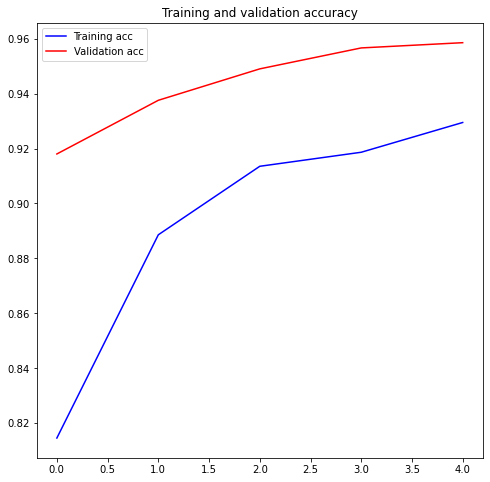

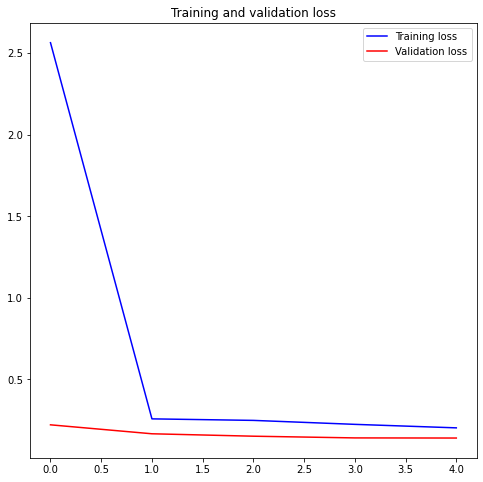

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(8,8))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
test_results = model2.evaluate(test)

66/66 [==============================] - 145s 2s/step - loss: 0.1416 - accuracy: 0.9451


In [110]:
test_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.3)
                                  
test_generator2 = test_datagen.flow_from_directory(test_folder,
                                                  target_size=(240, 240),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 2096 images belonging to 2 classes.


In [115]:
y_hat_test = model2.predict_generator(test_generator2, steps=54)

InvalidArgumentError:  Input to reshape is a tensor with 2621440 values, but the requested shape requires a multiple of 100352
	 [[node sequential_3/flatten_3/Reshape (defined at <ipython-input-112-a60becd866c6>:1) ]] [Op:__inference_predict_function_46041]

Function call stack:
predict_function


## Transfer Learning VGG19 + Image Augumentation 

In [98]:

from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))
model3 = models.Sequential()
model3.add(cnn_base)    
model3.add(Flatten())
model3.add(Dense(units = 128, activation = "relu"))
model3.add(Dropout(0.5))

model3.add(Dense(units = 1, activation = "sigmoid"))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model3.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model3.trainable_weights))

model3.summary()

vgg19 False
flatten_5 True
dense_13 True
dropout_2 True
dense_14 True
4
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 23,235,905
Trainable params: 3,211,521
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#model3.add(layers.Dense(128, activation='relu'))
#model3.add(layers.Dense(256, activation='relu'))
#model3.add(layers.Dense(128, activation='relu'))


In [99]:
# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_folder, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode="binary") 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode="binary",
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)



model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 4892 images belonging to 2 classes.
Found 2098 images belonging to 2 classes.
Found 2096 images belonging to 2 classes.


In [100]:
history3 = model3.fit(train_generator,
                              epochs=4,
                              validation_data=val_generator, validation_steps=10)

Epoch 1/4
245/245 [==============================] - 27611s 113s/step - loss: 0.0000e+00 - acc: 0.2868 - val_loss: 0.0000e+00 - val_acc: 0.2550
Epoch 2/4
 83/245 [=========>....................] - ETA: 2:45:44 - loss: 0.0000e+00 - acc: 0.2637

KeyboardInterrupt: 

In [ ]:
# Save model
model3.save('vgg19_3breeds_4epochs.h5')

import pickle
with open('model3.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available
    pickle.dump(history3, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Final Model Evaluation

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(240, 240),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)


In [ ]:
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

In [ ]:
def prepareImages(train, shape, data_path, mode):
    for index, row in train.iterrows():
        has_volcano = row['Volcano?']
        ...
        if has_volcano and mode == 'train':
            x_train[count] = img_to_array( cv2.flip( img, 1 ) )
            y_train[count] = int(has_volcano)
            count += 1
#repeat the same step three more times applying different transformation and incrementing count

In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train))) 

In [ ]:
#The augmentation is rotating the image by 10 degrees and change image brightness with a range of 0.2 to 1.0 (We also can do different data augmentation as well).

from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator


class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch


    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

balanced_gen = BalancedDataGenerator(X_train, y_train, datagen, batch_size=64)
balanced_gen_val = BalancedDataGenerator(X_val, y_val, datagen, batch_size=64)
steps_per_epoch = balanced_gen.steps_per_epoch

